In [1]:
from statsmodels.tsa.stattools import adfuller

#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [2]:
def adfuller(x, maxlag=None, regression="c",autolag="AIC",
             store=False,regresults=False):
    return

In [6]:
os.getcwd()

'/home/jovyan/work'

In [11]:
df_=pd.read_csv('./data/regression/bidunitHarrowTab.csv')

In [4]:
df=pd.read_csv('./data/regression/bidunitBexleyTab.csv')
df=df.drop(columns="levytotal")
df.head()

,bid_name,year,vacancy,levymean
0,Bexleyheath BID,2010,1.709402,542.691638
1,Bexleyheath BID,2011,3.428571,509.676538
2,Bexleyheath BID,2012,4.188482,470.022713
3,Bexleyheath BID,2013,3.676471,474.117233
4,Bexleyheath BID,2014,3.612167,558.222957


In [6]:
df1=df["vacancy"]

In [7]:
result = adfuller(df1)
print(result)

None


Text(564.2857142857143, 0.5, 'Average Business Rates')

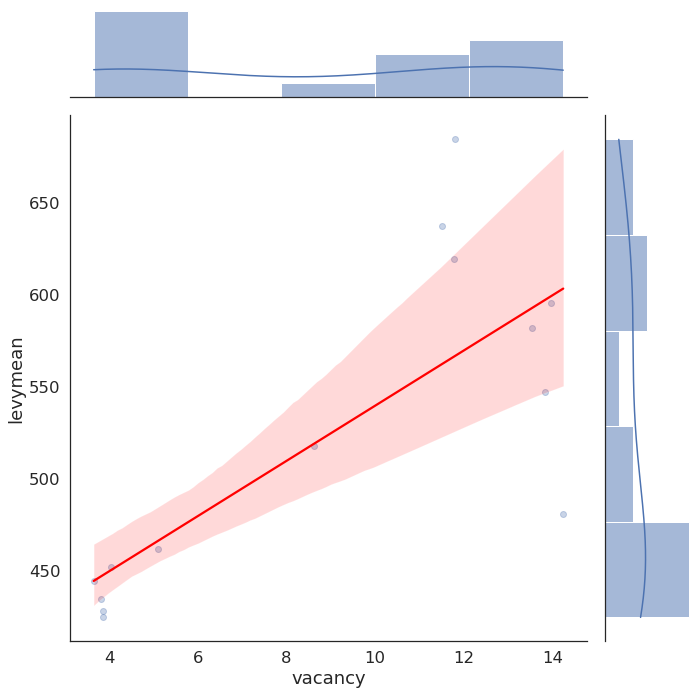

In [12]:
sns.jointplot(data=df_, # plot a scatterplot with a regression line and two histograms
                x='vacancy', # set the x axis to be the years of schooling
                y='levymean', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.3), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches 

plt.xlabel('Vacancy Rate') # add a label to the x axis
plt.ylabel('Average Business Rates') # add a label to the y axis

Text(564.2857142857143, 0.5, 'Average Business Rates')

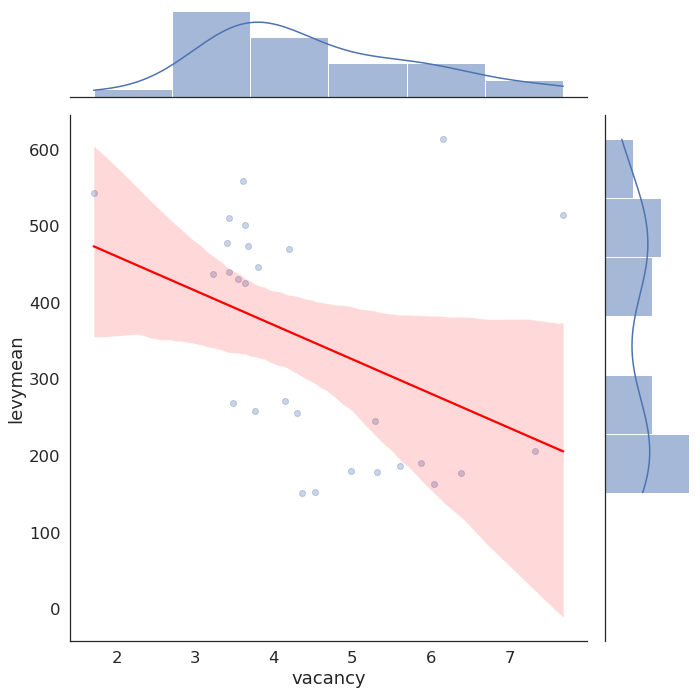

In [10]:
sns.jointplot(data=df, # plot a scatterplot with a regression line and two histograms
                x='vacancy', # set the x axis to be the years of schooling
                y='levymean', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.3), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches 

plt.xlabel('Vacancy Rate') # add a label to the x axis
plt.ylabel('Average Business Rates') # add a label to the y axis

## ols for Harrow

In [14]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model = ols('levymean ~  vacancy', data=df_).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               levymean   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     17.45
Date:                Thu, 03 Aug 2023   Prob (F-statistic):            0.00128
Time:                        21:32:07   Log-Likelihood:                -75.769
No. Observations:                  14   AIC:                             155.5
Df Residuals:                      12   BIC:                             156.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    389.8476     35.331     11.034      0.0

/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


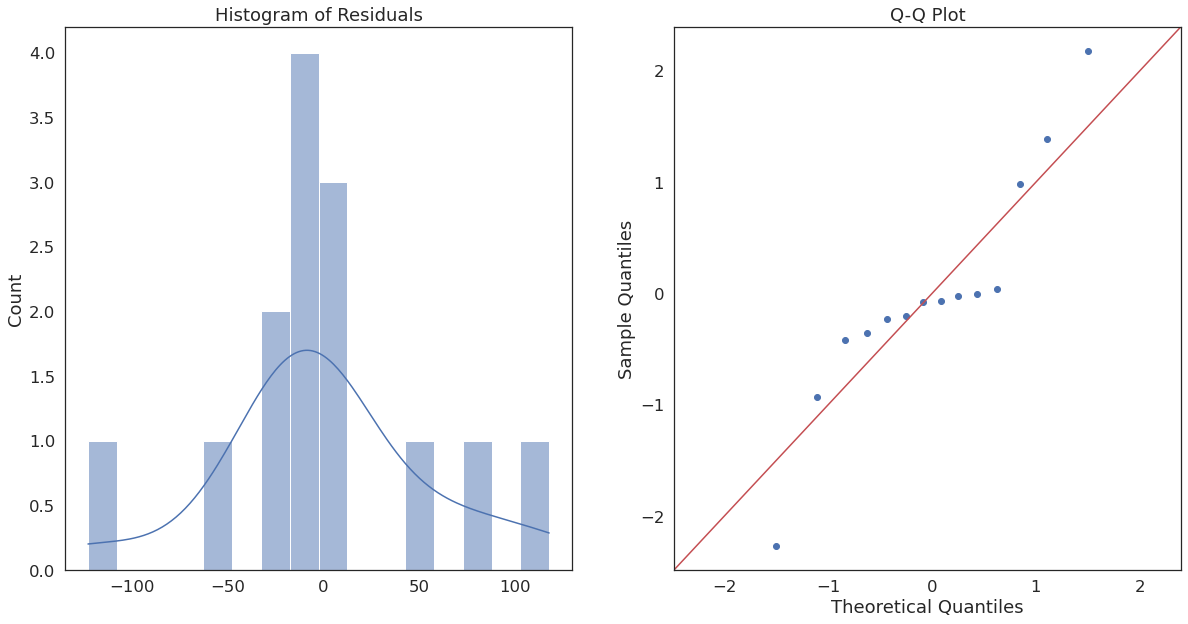

In [15]:
#model = ols('realhrwage ~  sch', data=reg_df).fit()  # fit a model
residuals = model.resid # get the residuals

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot

## footfall

In [2]:
df=pd.read_csv('./data/footfall/footfallGreenwich.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             10 non-null     int64  
 1   vacancy          10 non-null     float64
 2   footfalldensity  10 non-null     float64
 3   footfall         10 non-null     float64
 4   floor            10 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


In [3]:
X = df["vacancy"]
Y = df["footfalldensity"]
X
Y

0    8.446716
1    7.578348
2    7.119343
3    6.622567
4    6.448288
5    6.015653
6    3.570441
7    4.878963
8    3.725109
9    7.058563
Name: footfalldensity, dtype: float64

In [4]:
np.corrcoef(df["vacancy"],df["footfalldensity"])

array([[ 1.        , -0.46393193],
       [-0.46393193,  1.        ]])

Text(564.2857142857143, 0.5, 'Average Business Rates')

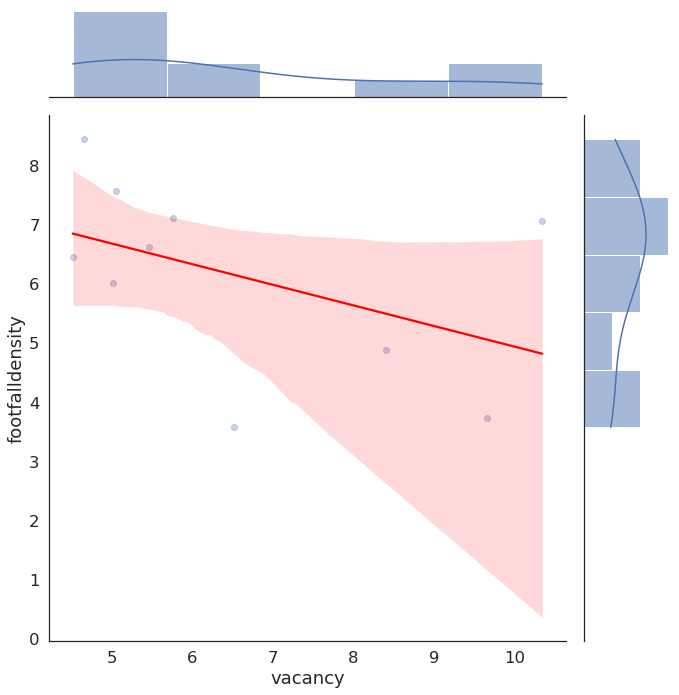

In [5]:
sns.jointplot(data=df, # plot a scatterplot with a regression line and two histograms
                x='vacancy', # set the x axis to be the years of schooling
                y='footfalldensity', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.3), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches 

plt.xlabel('Vacancy Rate') # add a label to the x axis
plt.ylabel('Average Business Rates') # add a label to the y axis

In [6]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model = ols('footfalldensity ~  vacancy', data=df).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        footfalldensity   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     2.194
Date:                Tue, 08 Aug 2023   Prob (F-statistic):              0.177
Time:                        21:20:48   Log-Likelihood:                -17.262
No. Observations:                  10   AIC:                             38.52
Df Residuals:                       8   BIC:                             39.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4282      1.614      5.223      0.0

/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


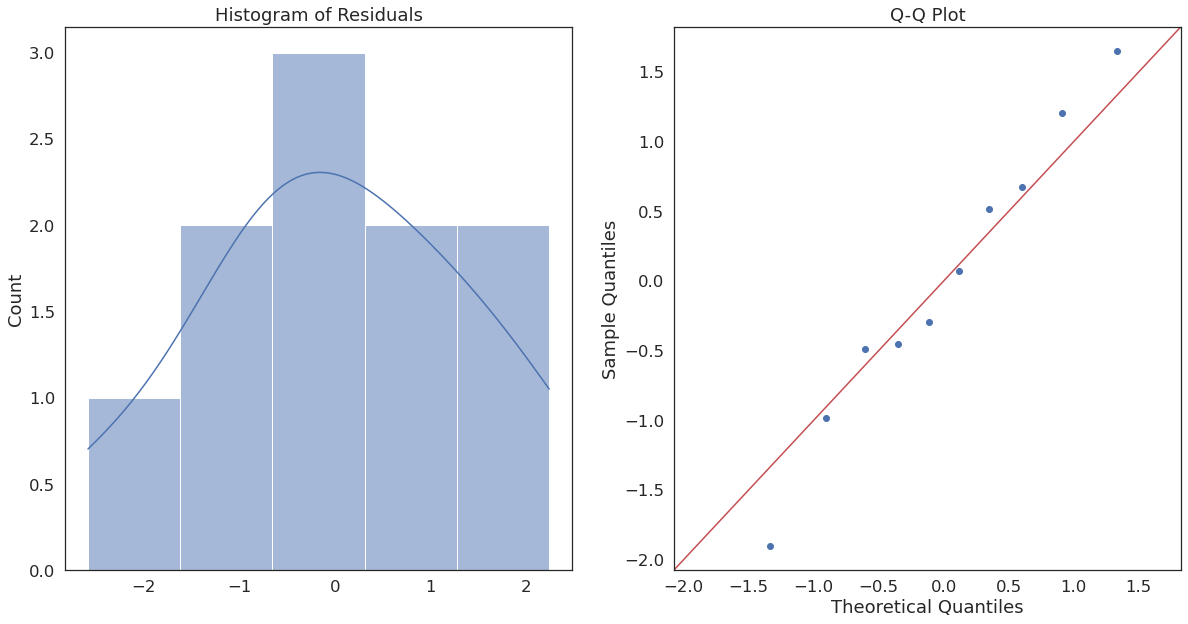

In [31]:
#model = ols('realhrwage ~  sch', data=reg_df).fit()  # fit a model
residuals = model.resid # get the residuals

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot